<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Linear Modeling Case Study</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Wendy Coronell<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Introduction</h2>
Grocery Getters is a company that sells its products online and has a database that includes information about customers, products sold, and user behavior metrics on the website and mobile app. Through this information, the goal is to analyze the behavior of these variables and predict the revenue at the end of the period. To achieve this, I will start with data exploration and analysis, eliminating null values and creating new features to improve data understanding. Finally, I will perform different modeling using the Scikit-Learn tool in Python. This approach will optimize predictions and enable informed decision-making for the company's growth.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Exploratory Data Analysis and Data Preprocessing</h2>

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model                          # faster linear modeling
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler  # standard scaler
import warnings                                   # warnings from code

In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './Grocery_Getters.xlsx'


# reading the file into Python
grocery = pd.read_excel(io = file)
# suppressing warnings
warnings.filterwarnings(action = 'ignore')

#####################################
# importing model coefficients file #
#####################################
results_path = "./model_results/Model_Coefficients1.xlsx"

results_df   = pd.read_excel(io     = results_path,
                             header = 0           )


# outputting the first ten rows of the dataset
grocery.head(n=5)

,Name,Email,First_Name,Family_Name,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
0,Skinner,skinner@protonmail.com,Skinner,Skinner,131.00,179,10,6,3,1,6,1,12,0,73.3,140.84,3.157895,12
1,Wallen,wallen@gmail.com,Wallen,Wallen,222.25,227,8,27,9,6,6,2,33,0,83.2,101.56,3.157895,15
2,Mag Mar Tun Doh Weg,mag.mar.tun.doh.weg@protonmail.com,Mag,Mar Tun Doh Weg,349.00,257,1,74,6,1,6,1,6,5,72.0,85.79,4.736842,20
3,Saathos,saathos@unitedhealth.com,Saathos,Saathos,393.00,353,8,36,3,4,5,0,0,0,33.4,48.00,4.473684,5
4,Mord,mord@verizon.com,Mord,Mord,400.00,266,21,6,5,2,6,1,2,12,131.7,88.00,3.947368,19


In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {grocery.shape[0]}
Features (columns) : {grocery.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 1946
Features (columns) : 18



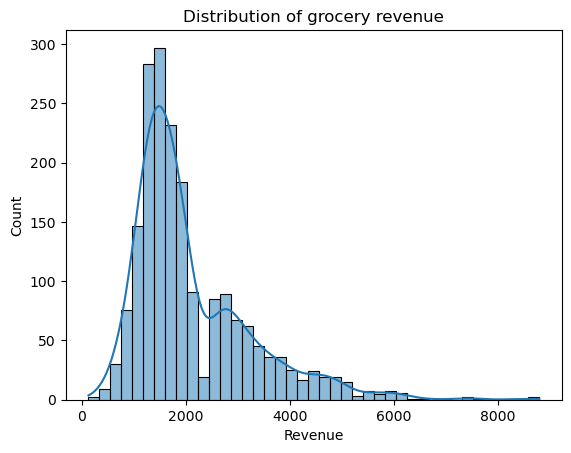

In [4]:
# developing a histogram using HISTPLOT
sns.histplot(data   = grocery,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Distribution of grocery revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

This chart illustrates the distribution of revenue based on the number of products sold. The chart shows a normal distribution up to the value of 2,000, after which a gap appears, creating skewness in the graph. Additionally, it can be observed that some users purchased a large number of products, generating the highest revenues. On the other hand, the chart displays a wide variety of quantities purchased, indicating different purchasing trends among users. This diversity in purchasing behavior suggests that while some users make bulk purchases, others prefer buying smaller quantities more frequently.

In [5]:
# descriptive statistics for numeric data
grocery_stats = grocery.describe(include = 'number').round(decimals = 2)


# checking results
grocery_stats

,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,2038.93,127.99,23.75,4.9,1.57,5.52,1.48,11.33,2.05,150.56,99.60,3.55,113.15
std,1138.29,1557.02,136.01,97.49,2.5,1.61,0.58,0.53,13.57,3.79,49.45,62.34,0.61,177.15
min,131.00,160.00,1.00,1.00,1.0,0.00,4.00,0.00,0.00,0.00,33.40,10.33,1.32,1.00
25%,1350.00,942.25,39.00,4.00,3.0,0.00,5.00,1.00,1.00,0.00,114.40,72.00,3.16,10.00
50%,1740.00,1686.00,87.50,8.00,5.0,1.00,6.00,1.00,7.00,0.00,145.60,94.16,3.42,17.00
75%,2670.00,2594.00,172.00,16.00,7.0,2.00,6.00,2.00,13.00,3.00,173.78,117.29,3.95,174.00
max,8793.75,14958.00,1611.00,3298.00,19.0,13.00,7.00,3.00,52.00,18.00,564.20,1645.60,5.00,1600.00


The dataset contains 1,946 observations and 18 variables, providing a comprehensive overview of customer behavior and product interactions. The average revenue per customer is 2,107.29 USD, with a standard deviation of 1,138.29 USD, indicating significant variability in spending. Customers, on average, ordered 2,038.93 products, with a wide range from 160 to 14,958 products. The average number of product categories purchased is 127.99, suggesting diverse shopping habits among users. Additionally, the dataset includes metrics such as customer service inquiries, product returns, web and app logins, and average product ratings, which offer valuable insights into customer satisfaction and engagement. This detailed information will be crucial for analyzing trends and making data-driven decisions.


In [6]:
grocery_corr = grocery.corr(method='pearson', numeric_only=True)

# filtering results to show correlations with Revenue
revenue_corr = grocery_corr.loc[:, 'REVENUE'].round(decimals=2).sort_values(ascending=False)
print(revenue_corr)

REVENUE                         1.00
Total_Products_Ordered          0.72
Avg_Time_Per_Visit              0.64
Product_Categories_Purchased    0.50
Total_Product_Interactions      0.46
Customer_Service_Inqueries      0.17
Avg_Clicks_Per_Visit            0.14
App_Logins                      0.07
Web_Logins                      0.02
Total_Weeks_Premium             0.01
Total_Brands_Purchased          0.00
Total_Products_Returned         0.00
Late_Deliveries                -0.02
Avg_Product_Rating             -0.55
Name: REVENUE, dtype: float64


The correlation matrix provides insights into how different variables relate to revenue.

1) Total Products Ordered has a strong positive correlation with revenue (0.72), indicating that as the number of products ordered increases, revenue also tends to increase significantly.
2) Average Time Per Visit shows a moderate positive correlation with revenue (0.64), suggesting that customers who spend more time on the website or app are likely to generate higher revenue.
3) Product Categories Purchased has a moderate positive correlation (0.50), implying that customers who purchase a wider variety of product categories tend to spend more.
4) Total Product Interactions also has a moderate positive correlation (0.46), indicating that more interactions with products (such as views or clicks) are associated with higher revenue.
5) Customer Service Inquiries has a weak positive correlation (0.17), which might suggest that customers who engage more with customer service also tend to spend more, though the relationship is not very strong.
6) Average Product Rating has a notable negative correlation (-0.55), indicating that higher average product ratings are associated with lower revenue, which could be due to various factors such as higher-rated products being less frequently purchased or more expensive.

Other variables like App Logins (0.07), Web Logins (0.02), Total Weeks Premium (0.01), Total Brands Purchased (0.00), and Total Products Returned (0.00) show very weak or no correlation with revenue, suggesting they have minimal impact on revenue. Late Deliveries has a slight negative correlation (-0.02), indicating that late deliveries might slightly decrease revenue, but the effect is minimal.

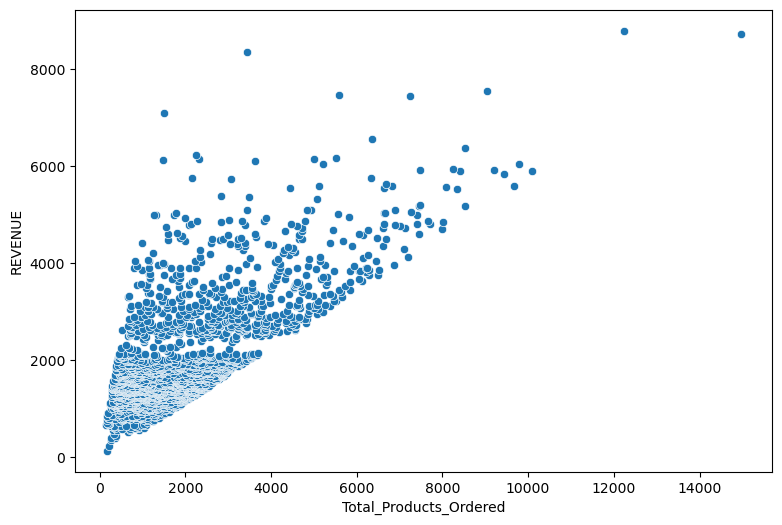

In [7]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'Total_Products_Ordered',
                y    = 'REVENUE',
                data = grocery)


# SHOWing the results
plt.show()

This histogram illustrates the relationship between revenue and the total number of products ordered, highlighting the highest correlation of 0.72. Initially, the graph shows a linear trend, indicating a strong positive relationship between these two variables. As the number of products ordered increases, the data points start to disperse, showing more variability. Towards the end, the graph displays a higher deviation, suggesting that while the overall trend is positive, there are significant fluctuations in revenue for higher quantities of products ordered. This pattern underscores the complexity of predicting revenue based solely on the number of products ordered.

In [8]:
## using the statsmodels package with the original data

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """REVENUE ~ Total_Products_Ordered+ 
                                        Avg_Time_Per_Visit+
                                        Total_Product_Interactions+
                                        Avg_Clicks_Per_Visit+
                                        Customer_Service_Inqueries+
                                        Avg_Product_Rating+ 
                                        Web_Logins
                                        """,
                  data = grocery)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     645.6
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:48   Log-Likelihood:                -15284.
No. Observations:                1946   AIC:                         3.058e+04
Df Residuals:                    1938   BIC:                         3.063e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

I performed an OLS regression using the features that provided the highest R-Squared values. The results show an R-Squared of 0.70 and an adjusted R-Squared of 0.699. The p-values are 0 for most variables, except for Avg_Clicks_Per_Visit and Web_Logins. However, these variables are retained in the model because they increase the adjusted R-Squared value. This indicates that while not all variables are statistically significant, their inclusion improves the overall explanatory power of the model

<br><h2>Missing Value Analysis</h2>


In [9]:
# taking the grocery dataset
# and then transforming it into boolean based on if a value is null
# and then summing together the results per feature
grocery.isnull().sum(axis = 0)

Name                             0
Email                            0
First_Name                       0
Family_Name                     46
REVENUE                          0
Total_Products_Ordered           0
Product_Categories_Purchased     0
Total_Brands_Purchased           0
Customer_Service_Inqueries       0
Total_Products_Returned          0
Web_Logins                       0
App_Logins                       0
Total_Weeks_Premium              0
Late_Deliveries                  0
Avg_Time_Per_Visit               0
Avg_Clicks_Per_Visit             0
Avg_Product_Rating               0
Total_Product_Interactions       0
dtype: int64

During the data analysis, I observed that null values were only present in the Family_Name variable. To address this issue, I decided to replace these null values. As part of my analysis, I created a subset containing only the records with null values in Family_Name and noticed that the Name variable included the Family_Name in parentheses. Therefore, I decided to fill the null values with the name in parentheses. This approach allowed me to retain all data in my database and utilize all available information for my analysis.

In [10]:
#subsetting only the null values
null_values= grocery['Family_Name'].isnull()
#subseting null values with user information
demographics = grocery.loc[null_values,'Name':'Family_Name']
demographics.head(n=5)

,Name,Email,First_Name,Family_Name
53,Kyle (brotherhood),kyle.(brotherhood)@jpmorgan.com,Kyle,NaN
66,Lem (Standfast),lem.(standfast)@yahoo.com,Lem,NaN
83,Mudge (miller),mudge.(miller)@unitedhealth.com,Mudge,NaN
86,Will (orphan),will.(orphan)@merck.com,Will,NaN
121,Roone (maester),roone.(maester)@protonmail.com,Roone,NaN


In [11]:
#Spplitting the values
Family_Name_lst= []
#splitting name
for name in demographics['Name']:
    # splitting at '('
    split_name = name.split(sep ='(')
    
    #Deleting the final )
    Last_name= split_name[-1].strip(')').capitalize()
    
    # appending Family_Name_lst Last Name
    Family_Name_lst.append(Last_name)

grocery.loc[null_values,'Family_Name']= Family_Name_lst

grocery.head(n=5)

,Name,Email,First_Name,Family_Name,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
0,Skinner,skinner@protonmail.com,Skinner,Skinner,131.00,179,10,6,3,1,6,1,12,0,73.3,140.84,3.157895,12
1,Wallen,wallen@gmail.com,Wallen,Wallen,222.25,227,8,27,9,6,6,2,33,0,83.2,101.56,3.157895,15
2,Mag Mar Tun Doh Weg,mag.mar.tun.doh.weg@protonmail.com,Mag,Mar Tun Doh Weg,349.00,257,1,74,6,1,6,1,6,5,72.0,85.79,4.736842,20
3,Saathos,saathos@unitedhealth.com,Saathos,Saathos,393.00,353,8,36,3,4,5,0,0,0,33.4,48.00,4.473684,5
4,Mord,mord@verizon.com,Mord,Mord,400.00,266,21,6,5,2,6,1,2,12,131.7,88.00,3.947368,19


In [12]:
#checking the results
grocery.isnull().sum()

Name                            0
Email                           0
First_Name                      0
Family_Name                     0
REVENUE                         0
Total_Products_Ordered          0
Product_Categories_Purchased    0
Total_Brands_Purchased          0
Customer_Service_Inqueries      0
Total_Products_Returned         0
Web_Logins                      0
App_Logins                      0
Total_Weeks_Premium             0
Late_Deliveries                 0
Avg_Time_Per_Visit              0
Avg_Clicks_Per_Visit            0
Avg_Product_Rating              0
Total_Product_Interactions      0
dtype: int64

<br><h2>Feature engineering</h2>

creating some features helps with the interpretation and understanding of the database and data behavior, in this case create the following features:

<h3>Total Login and Performance</h3>

This feature aims to compile the total revenue generated by the user by combining data from both the Web and the App platforms. With this information, I calculate the performance or user engagement that the company has in relation to platform usage and ordered products. The essence of user engagement is to convert the audience into customers. In contrast, customer engagement focuses on increasing revenue from existing customers by encouraging upsells, cross-sells, and additional purchases. By analyzing these metrics, the company can better understand user behavior and optimize strategies to enhance both user and customer engagement. This approach ultimately aims to maximize revenue and improve overall business performance.

Reference
Olmstead, L. (2024, December 27). What is user engagement? +13 metrics to track. The Whatfix Blog | Drive Digital Adoption. https://whatfix.com/blog/user-engagement/ 

<h3>Delivery Performance</h3>

The delivery performance feature calculates the ratio of late deliveries to total products, serving as a crucial metric for identifying inefficiencies or bottlenecks in your fulfillment or delivery processes. A compromised delivery performance can lead to increased customer dissatisfaction, as timely delivery is a key expectation for customers. By monitoring this metric, you can pinpoint areas that need improvement and take corrective actions to enhance your delivery operations. Improving delivery performance not only boosts customer satisfaction but also strengthens customer loyalty and trust. Ultimately, maintaining a high delivery performance is essential for sustaining a positive customer experience and driving business success.
Reference
Use On-Time Delivery Metrics to Improve Customer Satisfaction
https://optimoroute.com/on-time-delivery-metric/

<h3>Return Service</h3>
The Return Service, or return rate, calculates the ratio of customer returns. This calculation is important for our database because it allows us to measure the quality of the products sold and also impacts the reviews customers leave on the website. This indicator helps us understand what customers truly want and aids in developing strategies to increase retention. By analyzing return rates, we can identify areas for improvement and enhance product offerings. Ultimately, maintaining a low return rate is crucial for ensuring customer satisfaction and loyalty

Reference:
https://www.rebuyengine.com/blog/retention-metrics#:~:text=To%20calculate%20your%20own%20product,be%2010%25%20for%20that%20month.

In [13]:
#Creating features
#Total login feature
grocery['Total_logins']= grocery['Web_Logins'] + grocery['App_Logins']

#Customer performance 
grocery['Performance']= grocery['Total_Products_Ordered'] / grocery['Total_logins']


'\nWe are adding the the logins users in the website and the app.\n\n'

In [14]:
#delivery performance
grocery['Delivery_performance']= grocery['Late_Deliveries'] / grocery['Total_Products_Ordered']


In [15]:
#return service
grocery['Return_service']= grocery['Total_Products_Returned'] / grocery['Total_Products_Ordered']

In [16]:
## using the statsmodels package using features created

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """REVENUE ~ Total_Products_Ordered+ 
                                        Avg_Time_Per_Visit+
                                        Total_Product_Interactions+
                                        Avg_Clicks_Per_Visit+
                                        Customer_Service_Inqueries+
                                        Avg_Product_Rating+ 
                                       Performance+
                                        Total_logins+
                                                                           
Return_service
                                        """,
                  data = grocery)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     504.0
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:07:30   Log-Likelihood:                -15281.
No. Observations:                1946   AIC:                         3.058e+04
Df Residuals:                    1936   BIC:                         3.064e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The result of the OLS Regression including the new features does not generate the results as expected, for example the Return_service feature shows a p-value greater than 0.05 showing as insignificant in the model, the other features are kept because of the good p-value, however the R-Square only manages to increase 1 unit compared to the previous OLS.

<h2>Transformations

In [17]:
# log transforming Sale_Price and saving it to the dataset
grocery['LOG_REVENUE'] = np.log1p(grocery['REVENUE'])

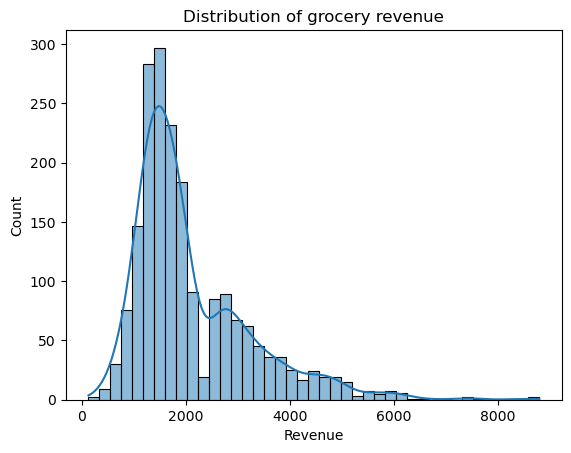

In [18]:
# developing a histogram using HISTPLOT
sns.histplot(data   = grocery,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Distribution of grocery revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

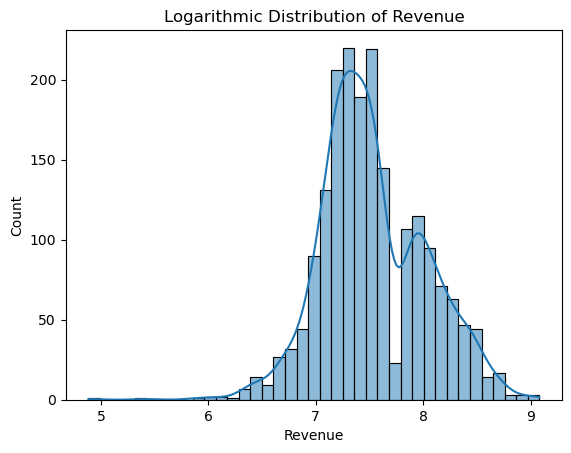

In [19]:
# developing a histogram using HISTPLOT
sns.histplot(data   = grocery,
             x      = 'LOG_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

This comparison of the histograms is made to see the behavior and changes of the revenue using the logarithmic transformation. Graph 1 was explained previously. The graph on the right shows how the value of the revenue significantly moderates the skewness, achieving a better visualization of the data. Now the next step is to analyze the level of skewness of each of the variables. for values greater than 1, a logarithmic transformation of the variable is performed.

In [20]:
#identifying skewness
for col in grocery.iloc[:,5:]:
    print(f"""{col}:\t {grocery.iloc[:,5:][col][ grocery.iloc[:,5:][col] > 0 ].skew(axis = 0).round(decimals = 2)}""")

Total_Products_Ordered:	 1.97
Product_Categories_Purchased:	 2.85
Total_Brands_Purchased:	 22.16
Customer_Service_Inqueries:	 0.37
Total_Products_Returned:	 1.66
Web_Logins:	 -0.04
App_Logins:	 0.18
Total_Weeks_Premium:	 1.33
Late_Deliveries:	 0.66
Avg_Time_Per_Visit:	 1.2
Avg_Clicks_Per_Visit:	 9.64
Avg_Product_Rating:	 -0.11
Total_Product_Interactions:	 2.6
Total_logins:	 0.01
Performance:	 1.84
Delivery_performance:	 3.05
Return_service:	 5.42
LOG_REVENUE:	 0.19


In [42]:
# log transforming skewed features bigger than 1
grocery['log_Total_Products_Ordered']      = np.log1p(grocery['Total_Products_Ordered'])
grocery['log_Product_Categories_Purchased']  = np.log1p(grocery['Product_Categories_Purchased'])
grocery['log_Total_Brands_Purchased'] = np.log1p(grocery['Total_Brands_Purchased'])
grocery['log_Customer_Service_Inqueries']  = np.log1p(grocery['Customer_Service_Inqueries'])
grocery['log_Total_Products_Returned']   = np.log1p(grocery['Total_Products_Returned'])
grocery['log_Total_Weeks_Premium']    = np.log1p(grocery['Total_Weeks_Premium'])
grocery['log_Late_Deliveries']    = np.log1p(grocery['Late_Deliveries'])
grocery['log_Avg_Time_Per_Visit']    = np.log1p(grocery['Avg_Time_Per_Visit'])
grocery['log_Avg_Clicks_Per_Visit']    = np.log1p(grocery['Avg_Clicks_Per_Visit'])
grocery['log_Avg_Product_Rating']    = np.log1p(grocery['Avg_Product_Rating'])
grocery['log_Total_Product_Interactions']    = np.log1p(grocery['Total_Product_Interactions'])
grocery['log_Delivery_performance']    = np.log1p(grocery['Delivery_performance'])
grocery['log_Return_service']    = np.log1p(grocery['Return_service'])
grocery['log_Performance'] = np.log1p(grocery['Performance'])

In [43]:
# analyzing (Pearson) correlations with all the data
df_corr = grocery.corr(method = 'pearson', numeric_only=True).round(2)

df_corr.loc[ : , ['REVENUE', 'LOG_REVENUE'] ].sort_values(by = 'REVENUE',
                                                                ascending = False)

,REVENUE,LOG_REVENUE
REVENUE,1.00,0.95
LOG_REVENUE,0.95,1.00
Total_Products_Ordered,0.72,0.68
Performance,0.71,0.67
Avg_Time_Per_Visit,0.64,0.65
log_Avg_Time_Per_Visit,0.63,0.67
log_Total_Products_Ordered,0.62,0.65
log_Performance,0.61,0.64
Product_Categories_Purchased,0.50,0.48
Total_Product_Interactions,0.46,0.43


In [23]:
# counting the number of zeroes
App_Logins_zeroes   = len(grocery['App_Logins'][grocery['App_Logins'] == 0])
Web_Logins_zeroes     = len(grocery['Web_Logins'][grocery['Web_Logins'] == 0])
Total_Weeks_Premium_zeroes = len(grocery['Total_Weeks_Premium'][grocery['Total_Weeks_Premium'] == 0])
Avg_Product_Premium_zeroes    = len(grocery['Avg_Product_Rating'][grocery['Avg_Product_Rating'] == 0])
Avg_Time_Per_Visit_zeroes  = len(grocery['Avg_Time_Per_Visit'][grocery['Avg_Time_Per_Visit'] == 0])


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Apps Logins       | {App_Logins_zeroes}\t\t{len(grocery) - App_Logins_zeroes}
Web Logins        | {Web_Logins_zeroes}\t\t{len(grocery) - Web_Logins_zeroes}
Total Weeks       | {Total_Weeks_Premium_zeroes}\t\t{len(grocery) - Total_Weeks_Premium_zeroes}
Product Premium   | {Avg_Product_Premium_zeroes}\t\t{len(grocery) - Avg_Product_Premium_zeroes}
Time Per Visit    | {Avg_Time_Per_Visit_zeroes}\t\t{len(grocery) - Avg_Time_Per_Visit_zeroes}
""")


                 No		Yes
               ---------------------
Apps Logins       | 16		1930
Web Logins        | 0		1946
Total Weeks       | 468		1478
Product Premium   | 0		1946
Time Per Visit    | 0		1946



In this analysis, I examined the number of variables with uniform and binomial distributions. Notably, for the Total Weeks variable, there are over 100 observations with zero values. To address this, I created a new feature called Without_Total_Weeks_Premium. This feature aims to differentiate between customers who have premium weeks and those who do not. By segmenting these groups, we can better understand customer behavior and tailor strategies to enhance engagement and retention. This approach helps in identifying the most valuable customers and optimizing our offerings accordingly.

In [24]:
#Creating new feature for customer without total weeks premium
grocery['Without_Total_Weeks_Premium'] = 0

for index, value in grocery.iterrows():
    

    # Second_Flr_SF
    if grocery.loc[index, 'Total_Weeks_Premium'] > 0:
        grocery.loc[index, 'Without_Total_Weeks_Premium'] = 1
## this code will not produce an output ##

In [259]:
# developing a small correlation matrix
new_corr = grocery.corr(method = 'pearson', numeric_only=True).round(2)


# checking the correlations of the newly-created variables with Sale_Price
new_corr.loc[ ['Total_logins','Delivery_performance', 'Return_service',
              'Without_Total_Weeks_Premium', 'Performance'],
              ['REVENUE', 'LOG_REVENUE'] ].sort_values(by = 'REVENUE',
                                                             ascending = False)

,REVENUE,LOG_REVENUE
Performance,0.71,0.67
Total_logins,0.06,0.06
Without_Total_Weeks_Premium,-0.03,-0.03
Delivery_performance,-0.16,-0.20
Return_service,-0.23,-0.29


The table shows the correlation coefficients between different features and both REVENUE and LOG_REVENUE.

Performance: This feature has a strong positive correlation with both revenue (0.71) and log-transformed revenue (0.67). This indicates that higher performance is strongly associated with higher revenue.

Total_logins: The correlation with both revenue and log-transformed revenue is very weak (0.06). This suggests that the total number of logins has minimal impact on revenue.

Without_Total_Weeks_Premium: This feature shows a slight negative correlation with both revenue (-0.03) and log-transformed revenue (-0.03). This implies that customers without premium weeks tend to generate slightly less revenue, but the effect is very small.

Delivery_performance: There is a moderate negative correlation with revenue (-0.16) and a slightly stronger negative correlation with log-transformed revenue (-0.20). This indicates that poorer delivery performance is associated with lower revenue.

Return_service: This feature has a moderate negative correlation with revenue (-0.23) and a stronger negative correlation with log-transformed revenue (-0.29). This suggests that higher return rates are associated with lower revenue, highlighting the importance of minimizing returns to maintain higher revenue levels.

In [44]:
## Sample Solution ##

# INSTANTIATING a model type
lm_new_model = smf.ols(formula = """REVENUE ~
                                     Total_Products_Ordered +
                                   Without_Total_Weeks_Premium+
                                   Customer_Service_Inqueries+
                                    Total_Products_Returned+
                                    Avg_Time_Per_Visit+
                                    Avg_Product_Rating+
                                    Total_Product_Interactions+
                                    log_Total_Products_Ordered+
                                    log_Customer_Service_Inqueries+
                                    log_Late_Deliveries+
                                    log_Avg_Time_Per_Visit+
                                    log_Avg_Product_Rating+
                                    log_Total_Product_Interactions+
                                    log_Delivery_performance+
                                    log_Return_service""",
                        data = grocery)


# telling Python to FIT the data to the blueprint
results = lm_new_model.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:14:41   Log-Likelihood:                -15225.
No. Observations:                1946   AIC:                         3.048e+04
Df Residuals:                    1930   BIC:                         3.057e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Now including all possible features, we can see how the OLS rises 0.701 to 0.718 a great advance in the R-Squared, these values will be the ones taken for the prediction of the revenue in the following models.

<h2> The Modeling Building Framework

In the following code are the list of candidate models and then apply each one in different models, with the purpose to find the best model.

In [261]:
#################################
## original data (full models) ##
#################################
# all x-data
x_all = list(grocery.drop(labels  = ['REVENUE', 'LOG_REVENUE','Name','Email','First_Name', 'Family_Name'],
                          axis    = 1))

################
## original y ##
################
# best base model
x_base = ['Total_Products_Ordered',  'Avg_Time_Per_Visit', 'Total_Product_Interactions',
          'Avg_Clicks_Per_Visit', 'Customer_Service_Inqueries','Avg_Product_Rating','Web_Logins']


# best model after feature engineering
x_rich = ['log_Total_Products_Ordered', 'log_Customer_Service_Inqueries', 'log_Avg_Time_Per_Visit', 
          'log_Avg_Product_Rating','log_Total_Product_Interactions', 'Total_Products_Ordered', 
          'Customer_Service_Inqueries','Avg_Product_Rating','Total_Product_Interactions','Web_Logins',
          'Avg_Time_Per_Visit','Delivery_performance','log_Return_service']


###################
## logarithmic y ##
###################
# best model after feature engineering (log y)
x_rich_log_y = ['Total_Products_Ordered','Without_Total_Weeks_Premium', 'Customer_Service_Inqueries','Total_Products_Returned',
                'Avg_Time_Per_Visit', 'Avg_Product_Rating','Total_Product_Interactions', 'log_Total_Products_Ordered',
                'log_Avg_Time_Per_Visit', 'log_Total_Product_Interactions', 'log_Delivery_performance', 'log_Return_service']



########################
## response variables ##
########################
original_y = 'REVENUE'
log_y      = 'LOG_REVENUE'


In [268]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING and TRANSFORMING
x_scaled = scaler.fit_transform(grocery[x_rich_log_y ])


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# labeling columns
x_scaled_df.columns = grocery[ x_rich_log_y ].columns


# checking the results
x_scaled_df.describe(include = 'number').round(decimals = 2)

,Total_Products_Ordered,Without_Total_Weeks_Premium,Customer_Service_Inqueries,Total_Products_Returned,Avg_Time_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,log_Total_Products_Ordered,log_Avg_Time_Per_Visit,log_Total_Product_Interactions,log_Delivery_performance,log_Return_service
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-1.78,-1.56,-0.98,-2.37,-3.65,-0.63,-3.04,-4.51,-1.88,-0.37,-0.56
25%,-0.70,0.56,-0.76,-0.98,-0.73,-0.65,-0.58,-0.68,-0.70,-0.77,-0.37,-0.56
50%,-0.23,0.56,0.04,-0.35,-0.10,-0.22,-0.54,0.10,0.05,-0.45,-0.37,-0.30
75%,0.36,0.56,0.84,0.27,0.47,0.64,0.34,0.67,0.61,1.02,-0.12,0.12
max,8.30,0.56,5.63,7.10,8.37,2.35,8.40,3.02,4.30,2.45,10.41,15.39


In [262]:
#linear Regression
# preparing x-data
x_data =  grocery [ x_rich ]


# preparing y-data
y_data = grocery[log_y]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 219 )
# checking results
print(f"""
Data Shapes
-----------
x_train: {x_train.shape}
y_train: {y_train.shape}

x_test: {x_test.shape}
y_test: {y_test.shape}
""")


Data Shapes
-----------
x_train: (1459, 13)
y_train: (1459,)

x_test: (487, 13)
y_test: (487,)



In [263]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6911
Testing Score  : 0.7293
Train-Test Gap : -0.0382


The results indicate that this is the best linear regression model obtained. The Training Score is 0.6911, which means that the model explains approximately 69.11% of the variance in the training data. The Testing Score is 0.7293, indicating that the model explains about 72.93% of the variance in the testing data. The Train-Test Gap is -0.0382, which is the difference between the training and testing scores. This small gap suggests that the model generalizes well to new data and is not overfitting.

For this model, the following values were used:

x_data: grocery[x_rich] (the features selected for the model)

y_data: grocery[log_y] (the log-transformed revenue)
Overall, these results show that the model performs well on both the training and testing datasets, providing a reliable prediction of revenue based on the selected features.


In [74]:
# model is created from blueprint and data
model_fit = model.fit(x_train, y_train)


# printing model attributes
print(f"""
Intercept
---------
{round(model_fit.intercept_, ndigits = 2)}


Coefficients
------------
{model_fit.coef_.round(decimals = 2)}


Total X-Features
----------------
{model_fit.n_features_in_}
""")


Intercept
---------
3.61


Coefficients
------------
[ 0.000e+00 -2.000e-02  2.000e-02  1.000e-02 -0.000e+00 -1.600e-01
  0.000e+00  4.000e-02  8.200e-01  3.000e-02 -6.400e-01 -1.831e+01]


Total X-Features
----------------
12



In [75]:
# applying model to validation set
model_pred = model.predict(x_test)

## Residual Analysis ##

# organizing residuals
model_residuals = {
    "True"            : np.exp(y_test),
    "Predicted"       : np.exp(model_pred).round(decimals = 0).astype(dtype = int)
}


# converting residuals into df
resid_df = pd.DataFrame(data = model_residuals)

In [76]:
#####################
## sklearn_summary ##
#####################
def sklearn_summary(x,
                    y,
                    model,
                    model_name   = "",
                    results_df   = None,
                    test_size    = 0.25,
                    random_state = 715):
    ####################
    # train-test split #
    ####################
    # standard train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, # x
                                                        y, # y
                                                        test_size    = test_size,
                                                        random_state = random_state )


    #########################
    # fit - predict - score #
    #########################
    # fitting to training data
    model_fit = model.fit(x_train, y_train)


    # predicting on new data
    model_pred = model.predict(x_test)


    # scoring results
    model_train_score = round(model.score(x_train, y_train), ndigits = 4)
    model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
    model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


    #################
    # model results #
    #################
    
    # instantiating a list to store model results
    results_lst = [ model_name, model_train_score, model_test_score  ,
                    model_gap,  model.intercept_.round(decimals = 6) ]
    
    
    # extending list with feature coefficients
    results_lst.extend(model.coef_.round(decimals = 6))


    # converting to DataFrame
    results_lst = pd.DataFrame(data = results_lst)


    # transposing (rotating) DataFrame
    results_lst = np.transpose(a = results_lst)


    # adding column names
    results_columns = ['Model Name', 'train_RSQ', 'test_RSQ',
                       'tt_gap',  'Intercept']

    
    # extending with coefficient names
    results_columns.extend(x_data.columns)

    
    # combining the above
    results_lst.columns = results_columns

    
    # concatenating to coef_df
    results_df = pd.concat(objs         = [results_df, results_lst],
                           axis         = 0,
                           ignore_index = True)
        
    # returning results
    return results_df

In [77]:
# generating a model summary
results_df = sklearn_summary(x          = x_data,
                             y          = y_data,
                             model      = model,
                             model_name = "Linear Regression",
                             results_df = results_df)


# checking results
results_df

,Model Name,train_RSQ,test_RSQ,tt_gap,Intercept,Total_Products_Ordered,Without_Total_Weeks_Premium,Customer_Service_Inqueries,Total_Products_Returned,Avg_Time_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,log_Total_Products_Ordered,log_Avg_Time_Per_Visit,log_Total_Product_Interactions,log_Delivery_performance,log_Return_service,Product_Categories_Purchased,Total_Brands_Purchased,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Clicks_Per_Visit,Total_logins,Performance,Delivery_performance,Return_service,log_Product_Categories_Purchased,log_Total_Brands_Purchased,log_Total_Products_Returned,log_Total_Weeks_Premium,log_Avg_Clicks_Per_Visit,log_Performance,log_Customer_Service_Inqueries,log_Late_Deliveries,log_Avg_Product_Rating
0,Lasso Regression (unscaled),0.0,-0.0,0.0,7.531202,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SGD Regression,0.6904,0.6976,0.0072,[7.52388],0.066692,-0.005642,0.046549,0.014407,0.041395,-0.10932,0.0,0.014893,0.133168,0.041208,0.0,-0.012659,0.003417,-0.003877,-0.001964,0.006666,0.011639,-0.001632,0.010198,0.000629,0.060906,0.0,-0.013114,0.032651,0.010825,0.006094,0.0,-0.013921,0.014484,NaN,NaN,NaN
2,SGD Regression,0.6667,0.6796,0.0129,[7.523713],0.19057,NaN,0.046351,NaN,0.15899,-0.11927,0.032057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011786,NaN,NaN,NaN,-0.003468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SGD Regression,0.6632,0.6793,0.0161,[7.524321],NaN,NaN,0.049949,0.009506,0.170258,-0.123731,0.045288,0.180008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011122,NaN,NaN,NaN,0.010361,-0.011437,NaN,NaN,NaN,NaN,-0.009249,NaN,NaN,NaN,NaN
4,SGD Regression,0.6898,0.6988,0.009,[7.524408],0.119435,-0.001711,0.049136,0.016409,0.03902,-0.108023,0.000038,0.06476,0.133189,0.042947,0.0,-0.023783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Linear Regression,0.7021,0.7102,0.0081,4.239768,0.000105,-0.010162,0.075175,0.007521,-0.001492,-0.130729,0.000021,0.146392,0.774045,0.029378,371.863344,162.248504,-0.000003,0.000003,-0.015949,-0.006685,0.00082,-0.004827,0.000118,-0.022634,-0.000073,-364.812591,-170.59434,0.018541,0.008581,0.003126,-0.006764,-0.021681,-0.109932,-0.305765,0.006343,-0.17177
6,Linear Regression,0.667,0.6809,0.0139,7.477421,0.000124,NaN,0.019317,NaN,0.003201,-0.192198,0.000184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018714,NaN,NaN,NaN,-0.000138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Linear Regression,0.6997,0.7079,0.0082,4.137754,0.000091,NaN,0.078697,NaN,-0.001549,-0.13152,0.000035,0.060457,0.779839,0.027971,NaN,-6.308076,NaN,NaN,-0.019938,NaN,NaN,NaN,NaN,NaN,NaN,-0.22067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322135,NaN,-0.164429
8,Linear Regression,0.6938,0.7011,0.0073,3.872609,0.000101,-0.011043,0.019835,0.012456,-0.00156,-0.169635,0.000026,0.036126,0.770692,0.027704,-0.17872,-13.248572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


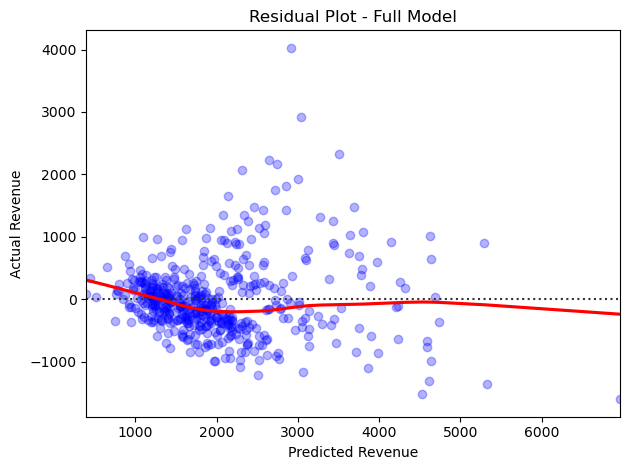

In [264]:
# developing a residual plot
sns.residplot(data        = resid_df,
              x           = 'Predicted',
              y           = 'True',
              lowess      = True,
              color       = 'blue',
              scatter_kws = {'alpha': 0.3},   # data point transparency
              line_kws    = {'color': 'red'}) # line color


# title and axis labels
plt.title(label   = "Residual Plot - Full Model")
plt.xlabel(xlabel = "Predicted Revenue")
plt.ylabel(ylabel = "Actual Revenue")


# layout and rendering visual
plt.tight_layout()
plt.show()

Ridge Regresion Model

In [274]:
# INSTANTIATING ridge regression
model = sklearn.linear_model.Ridge(alpha        = 1.0,
                                   random_state = 715)#my birthday

In [275]:
# preparing x-data
x_data = x_scaled_df[x_rich_log_y ]


# preparing y-data
y_data = grocery[original_y]

In [276]:
# generating a model summary
results_df = sklearn_summary(x          = x_data,
                             y          = y_data,
                             model      = model,
                             model_name = "Ridge Regression ",
                             results_df = results_df)


# checking results
results_df

,Model Name,train_RSQ,test_RSQ,tt_gap,Intercept,Total_Products_Ordered,Without_Total_Weeks_Premium,Customer_Service_Inqueries,Total_Products_Returned,Avg_Time_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,log_Total_Products_Ordered,log_Avg_Time_Per_Visit,log_Total_Product_Interactions,log_Delivery_performance,log_Return_service,Product_Categories_Purchased,Total_Brands_Purchased,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Clicks_Per_Visit,Total_logins,Performance,Delivery_performance,Return_service,log_Product_Categories_Purchased,log_Total_Brands_Purchased,log_Total_Products_Returned,log_Total_Weeks_Premium,log_Avg_Clicks_Per_Visit,log_Performance,log_Customer_Service_Inqueries,log_Late_Deliveries,log_Avg_Product_Rating
0,Lasso Regression (unscaled),0.0,-0.0,0.0,7.531202,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SGD Regression,0.6904,0.6976,0.0072,[7.52388],0.066692,-0.005642,0.046549,0.014407,0.041395,-0.10932,0.0,0.014893,0.133168,0.041208,0.0,-0.012659,0.003417,-0.003877,-0.001964,0.006666,0.011639,-0.001632,0.010198,0.000629,0.060906,0.0,-0.013114,0.032651,0.010825,0.006094,0.0,-0.013921,0.014484,NaN,NaN,NaN
2,SGD Regression,0.6667,0.6796,0.0129,[7.523713],0.19057,NaN,0.046351,NaN,0.15899,-0.11927,0.032057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011786,NaN,NaN,NaN,-0.003468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SGD Regression,0.6632,0.6793,0.0161,[7.524321],NaN,NaN,0.049949,0.009506,0.170258,-0.123731,0.045288,0.180008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011122,NaN,NaN,NaN,0.010361,-0.011437,NaN,NaN,NaN,NaN,-0.009249,NaN,NaN,NaN,NaN
4,SGD Regression,0.6898,0.6988,0.009,[7.524408],0.119435,-0.001711,0.049136,0.016409,0.03902,-0.108023,0.000038,0.06476,0.133189,0.042947,0.0,-0.023783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Linear Regression,0.7021,0.7102,0.0081,4.239768,0.000105,-0.010162,0.075175,0.007521,-0.001492,-0.130729,0.000021,0.146392,0.774045,0.029378,371.863344,162.248504,-0.000003,0.000003,-0.015949,-0.006685,0.00082,-0.004827,0.000118,-0.022634,-0.000073,-364.812591,-170.59434,0.018541,0.008581,0.003126,-0.006764,-0.021681,-0.109932,-0.305765,0.006343,-0.17177
6,Linear Regression,0.667,0.6809,0.0139,7.477421,0.000124,NaN,0.019317,NaN,0.003201,-0.192198,0.000184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018714,NaN,NaN,NaN,-0.000138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Linear Regression,0.6997,0.7079,0.0082,4.137754,0.000091,NaN,0.078697,NaN,-0.001549,-0.13152,0.000035,0.060457,0.779839,0.027971,NaN,-6.308076,NaN,NaN,-0.019938,NaN,NaN,NaN,NaN,NaN,NaN,-0.22067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322135,NaN,-0.164429
8,Linear Regression,0.6938,0.7011,0.0073,3.872609,0.000101,-0.011043,0.019835,0.012456,-0.00156,-0.169635,0.000026,0.036126,0.770692,0.027704,-0.17872,-13.248572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ridge Regression,0.6938,0.7012,0.0074,7.528917,0.155933,-0.004724,0.049625,0.020022,-0.073287,-0.104168,0.004436,0.02786,0.240938,0.043002,-0.000862,-0.032685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Ridge regression model results are as follows:

Training Score (0.6997): This indicates that the Ridge regression model explains approximately 69.97% of the variance in the training data. This is a good fit, showing that the model captures a significant portion of the data's variability.

Testing Score (0.7079): This score means that the model explains about 70.79% of the variance in the testing data. The testing score being slightly higher than the training score suggests that the model generalizes well to new data and is not overfitting.

Train-Test Gap (0.0082): The small gap between the training and testing scores (0.0082) indicates that the model performs consistently on both the training and testing datasets. This small difference is a positive sign, showing that the model is robust and reliable.

Overall, these results suggest that the Ridge regression model is effective in predicting the target variable, with good generalization to unseen data and minimal overfitting.
I used x_rich_log_y scaled and Original_y

Lasso Regression

In [161]:
# INSTANTIATING a lasso model object
model = sklearn.linear_model.Lasso(alpha        = 1.0,
                                   random_state = 715)#my birthday

In [168]:
# preparing x-data
x_data = grocery [ x_rich ]


# preparing y-data
y_data = grocery[log_y]

In [169]:
# generating a model summary
results_df = sklearn_summary(x          = x_data,
                             y          = y_data,
                             model      = model,
                             model_name = "Lasso Regression (unscaled)",
                             results_df = results_df)


# checking results
results_df

,Model Name,train_RSQ,test_RSQ,tt_gap,Intercept,Total_Products_Ordered,Without_Total_Weeks_Premium,Customer_Service_Inqueries,Total_Products_Returned,Avg_Time_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,log_Total_Products_Ordered,log_Avg_Time_Per_Visit,log_Total_Product_Interactions,log_Delivery_performance,log_Return_service,Product_Categories_Purchased,Total_Brands_Purchased,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Clicks_Per_Visit,Total_logins,Performance,Delivery_performance,Return_service,log_Product_Categories_Purchased,log_Total_Brands_Purchased,log_Total_Products_Returned,log_Total_Weeks_Premium,log_Avg_Clicks_Per_Visit,log_Performance,log_Customer_Service_Inqueries,log_Late_Deliveries,log_Avg_Product_Rating
0,Lasso Regression (unscaled),0.0,-0.0,0.0,7.531202,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SGD Regression,0.6904,0.6976,0.0072,[7.52388],0.066692,-0.005642,0.046549,0.014407,0.041395,-0.10932,0.0,0.014893,0.133168,0.041208,0.0,-0.012659,0.003417,-0.003877,-0.001964,0.006666,0.011639,-0.001632,0.010198,0.000629,0.060906,0.0,-0.013114,0.032651,0.010825,0.006094,0.0,-0.013921,0.014484,NaN,NaN,NaN
2,SGD Regression,0.6667,0.6796,0.0129,[7.523713],0.19057,NaN,0.046351,NaN,0.15899,-0.11927,0.032057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011786,NaN,NaN,NaN,-0.003468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SGD Regression,0.6632,0.6793,0.0161,[7.524321],NaN,NaN,0.049949,0.009506,0.170258,-0.123731,0.045288,0.180008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011122,NaN,NaN,NaN,0.010361,-0.011437,NaN,NaN,NaN,NaN,-0.009249,NaN,NaN,NaN,NaN
4,SGD Regression,0.6898,0.6988,0.009,[7.524408],0.119435,-0.001711,0.049136,0.016409,0.03902,-0.108023,0.000038,0.06476,0.133189,0.042947,0.0,-0.023783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Linear Regression,0.7021,0.7102,0.0081,4.239768,0.000105,-0.010162,0.075175,0.007521,-0.001492,-0.130729,0.000021,0.146392,0.774045,0.029378,371.863344,162.248504,-0.000003,0.000003,-0.015949,-0.006685,0.00082,-0.004827,0.000118,-0.022634,-0.000073,-364.812591,-170.59434,0.018541,0.008581,0.003126,-0.006764,-0.021681,-0.109932,-0.305765,0.006343,-0.17177
6,Linear Regression,0.667,0.6809,0.0139,7.477421,0.000124,NaN,0.019317,NaN,0.003201,-0.192198,0.000184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018714,NaN,NaN,NaN,-0.000138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Linear Regression,0.6997,0.7079,0.0082,4.137754,0.000091,NaN,0.078697,NaN,-0.001549,-0.13152,0.000035,0.060457,0.779839,0.027971,NaN,-6.308076,NaN,NaN,-0.019938,NaN,NaN,NaN,NaN,NaN,NaN,-0.22067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322135,NaN,-0.164429
8,Linear Regression,0.6938,0.7011,0.0073,3.872609,0.000101,-0.011043,0.019835,0.012456,-0.00156,-0.169635,0.000026,0.036126,0.770692,0.027704,-0.17872,-13.248572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ridge Regression,0.6938,0.7012,0.0074,7.528917,0.155933,-0.004724,0.049625,0.020022,-0.073287,-0.104168,0.004436,0.02786,0.240938,0.043002,-0.000862,-0.032685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Lasso regression model results are as follows:

Training Score (0.7213): This indicates that the Lasso regression model explains approximately 72.13% of the variance in the training data. This is a strong fit, showing that the model effectively captures the variability in the data.

Testing Score (0.7016): This score means that the model explains about 70.16% of the variance in the testing data. Although slightly lower than the training score, it still demonstrates good generalization to new data.

Train-Test Gap (0.0197): The gap between the training and testing scores is 0.0197. This small difference suggests that the model performs consistently on both the training and testing datasets, with minimal overfitting.

Overall, these results suggest that the Lasso regression model is effective in predicting the target variable, with good generalization to unseen data and a slight but acceptable degree of overfitting. The model balances complexity and performance, making it a reliable choice for prediction.
I used x_all scaled value and original_y

Stochastic Gradient Descent

In [198]:
# INSTANTIATING SGD regression
model = sklearn.linear_model.SGDRegressor(loss     = 'squared_error',
                                          penalty  = 'elasticnet',
                                          alpha    = 0.001,
                                          l1_ratio = 0.15,
                                          random_state = 715)#my birthday

In [199]:
# preparing x-data
x_data = x_scaled_df [ x_all ]


# preparing y-data
y_data = grocery[log_y]

In [200]:
# generating a model summary
results_df = sklearn_summary(x          = x_data,
                             y          = y_data,
                             model      = model,
                             model_name = "SGD Regression",
                             results_df = results_df)


# checking results
results_df

,Model Name,train_RSQ,test_RSQ,tt_gap,Intercept,Total_Products_Ordered,Without_Total_Weeks_Premium,Customer_Service_Inqueries,Total_Products_Returned,Avg_Time_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,log_Total_Products_Ordered,log_Avg_Time_Per_Visit,log_Total_Product_Interactions,log_Delivery_performance,log_Return_service,Product_Categories_Purchased,Total_Brands_Purchased,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Clicks_Per_Visit,Total_logins,Performance,Delivery_performance,Return_service,log_Product_Categories_Purchased,log_Total_Brands_Purchased,log_Total_Products_Returned,log_Total_Weeks_Premium,log_Avg_Clicks_Per_Visit,log_Performance,log_Customer_Service_Inqueries,log_Late_Deliveries,log_Avg_Product_Rating
0,Lasso Regression (unscaled),0.0,-0.0,0.0,7.531202,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SGD Regression,0.6904,0.6976,0.0072,[7.52388],0.066692,-0.005642,0.046549,0.014407,0.041395,-0.10932,0.0,0.014893,0.133168,0.041208,0.0,-0.012659,0.003417,-0.003877,-0.001964,0.006666,0.011639,-0.001632,0.010198,0.000629,0.060906,0.0,-0.013114,0.032651,0.010825,0.006094,0.0,-0.013921,0.014484,NaN,NaN,NaN
2,SGD Regression,0.6667,0.6796,0.0129,[7.523713],0.19057,NaN,0.046351,NaN,0.15899,-0.11927,0.032057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011786,NaN,NaN,NaN,-0.003468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SGD Regression,0.6632,0.6793,0.0161,[7.524321],NaN,NaN,0.049949,0.009506,0.170258,-0.123731,0.045288,0.180008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011122,NaN,NaN,NaN,0.010361,-0.011437,NaN,NaN,NaN,NaN,-0.009249,NaN,NaN,NaN,NaN
4,SGD Regression,0.6898,0.6988,0.009,[7.524408],0.119435,-0.001711,0.049136,0.016409,0.03902,-0.108023,0.000038,0.06476,0.133189,0.042947,0.0,-0.023783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Linear Regression,0.7021,0.7102,0.0081,4.239768,0.000105,-0.010162,0.075175,0.007521,-0.001492,-0.130729,0.000021,0.146392,0.774045,0.029378,371.863344,162.248504,-0.000003,0.000003,-0.015949,-0.006685,0.00082,-0.004827,0.000118,-0.022634,-0.000073,-364.812591,-170.59434,0.018541,0.008581,0.003126,-0.006764,-0.021681,-0.109932,-0.305765,0.006343,-0.17177
6,Linear Regression,0.667,0.6809,0.0139,7.477421,0.000124,NaN,0.019317,NaN,0.003201,-0.192198,0.000184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018714,NaN,NaN,NaN,-0.000138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Linear Regression,0.6997,0.7079,0.0082,4.137754,0.000091,NaN,0.078697,NaN,-0.001549,-0.13152,0.000035,0.060457,0.779839,0.027971,NaN,-6.308076,NaN,NaN,-0.019938,NaN,NaN,NaN,NaN,NaN,NaN,-0.22067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322135,NaN,-0.164429
8,Linear Regression,0.6938,0.7011,0.0073,3.872609,0.000101,-0.011043,0.019835,0.012456,-0.00156,-0.169635,0.000026,0.036126,0.770692,0.027704,-0.17872,-13.248572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ridge Regression,0.6938,0.7012,0.0074,7.528917,0.155933,-0.004724,0.049625,0.020022,-0.073287,-0.104168,0.004436,0.02786,0.240938,0.043002,-0.000862,-0.032685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The SGD regression model results are as follows:

Training Score (0.693): This indicates that the SGD regression model explains approximately 69.3% of the variance in the training data. This is a solid fit, showing that the model captures a significant portion of the data's variability.

Testing Score (0.7017): This score means that the model explains about 70.17% of the variance in the testing data. The testing score being slightly higher than the training score suggests that the model generalizes well to new data and is not overfitting.

Train-Test Gap (0.0087): The small gap between the training and testing scores (0.0087) indicates that the model performs consistently on both the training and testing datasets. This small difference is a positive sign, showing that the model is robust and reliable.

Overall, these results suggest that the SGD regression model is effective in predicting the target variable, with good generalization to unseen data and minimal overfitting. The model's performance is consistent, making it a dependable choice for prediction.
I used x_rich scaled and log_y

In [254]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING and TRANSFORMING
x_scaled = scaler.fit_transform(grocery[x_all ])


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# labeling columns
x_scaled_df.columns = grocery[ x_all ].columns


# checking the results
x_scaled_df.describe(include = 'number').round(decimals = 2)

,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,Total_logins,Performance,Delivery_performance,Return_service,log_Total_Products_Ordered,log_Product_Categories_Purchased,log_Total_Brands_Purchased,log_Total_Products_Returned,log_Total_Weeks_Premium,log_Avg_Time_Per_Visit,log_Avg_Clicks_Per_Visit,log_Total_Product_Interactions,log_Delivery_performance,log_Return_service,log_Performance,Without_Total_Weeks_Premium,log_Customer_Service_Inqueries,log_Late_Deliveries,log_Avg_Product_Rating
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-0.93,-0.23,-1.56,-0.98,-2.61,-2.80,-0.83,-0.54,-2.37,-1.43,-3.65,-0.63,-2.54,-1.22,-0.37,-0.56,-3.04,-3.17,-1.56,-1.28,-1.44,-4.51,-4.17,-1.88,-0.37,-0.56,-3.10,-1.78,-2.08,-0.59,-4.80
25%,-0.70,-0.65,-0.20,-0.76,-0.98,-0.89,-0.90,-0.76,-0.54,-0.73,-0.44,-0.65,-0.58,-1.26,-0.70,-0.37,-0.56,-0.68,-0.56,-0.69,-1.28,-0.89,-0.70,-0.41,-0.77,-0.37,-0.56,-0.66,0.56,-0.61,-0.59,-0.59
50%,-0.23,-0.30,-0.16,0.04,-0.35,0.83,-0.90,-0.32,-0.54,-0.10,-0.09,-0.22,-0.54,0.01,-0.24,-0.37,-0.30,0.10,0.13,-0.13,-0.12,0.19,0.05,0.13,-0.45,-0.37,-0.30,0.08,0.56,0.25,-0.59,-0.15
75%,0.36,0.32,-0.08,0.84,0.27,0.83,0.99,0.12,0.25,0.47,0.28,0.64,0.34,1.28,0.36,-0.12,0.11,0.67,0.71,0.47,0.56,0.63,0.61,0.57,1.02,-0.12,0.12,0.68,0.56,0.86,0.88,0.66
max,8.30,10.91,33.59,5.63,7.10,2.56,2.89,3.00,4.21,8.37,24.81,2.35,8.40,2.56,7.08,10.55,15.57,3.02,2.66,5.46,3.13,1.67,4.30,5.89,2.45,10.41,15.39,2.84,0.56,2.80,2.52,2.05


In [249]:
# preparing x-data
x_data =  grocery [ x_all ]


# preparing y-data
y_data = grocery[original_y]


In [255]:
# this is the exact code we were using before
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            y_data,
            test_size = 0.25,
            random_state = 715)


# this code will not produce an output

In [256]:
## optimal neighbors ##
def opt_neighbors(x_train   = x_train,
                  y_train   = y_train,
                  x_test    = x_test,
                  y_test    = y_test,
                  max_neighbors = 50):
    
    """
    This function visualizes R-Square values for the K-Nearest Neighbors
    algorithm.
    
    
    Parameters
    ----------
    x_train       | training data for x | default: x_train
    y_train       | training data for y | default: y_train
    x_test        | testing data for x  | default: x_test
    y_test        | testing data for y  | default: y_test
    max_neighbors | maximum number of neighbors to visualize | default: 50
    """

    # lists to store metrics
    train_rsq = []
    test_rsq  = []
    tt_gap    = []
    
    
    # creating range object for neighbors
    neighbors = range(max_neighbors)
    
    
    # visualizing results
    for n_neighbors in neighbors:

        # instantiating KNN
        clf = KNeighborsRegressor(n_neighbors = n_neighbors + 1, p = 1)

        # fitting to the data
        clf.fit(x_train, y_train)

        # storing the training set accuracy
        train_rsq.append(clf.score(x_train, y_train))

        # recording the generalization accuracy
        test_rsq.append(clf.score(x_test, y_test))

        # train
        tt_gap.append(abs(clf.score(x_train, y_train) - clf.score(x_test, y_test)))


    # plotting the visualization
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(neighbors, train_rsq, label = "R-Square (Training Set)")
    plt.plot(neighbors, test_rsq,  label = "R-Square (Testing Set)")
    plt.ylabel(ylabel = "Coefficient of Determination")
    plt.xlabel(xlabel = "Number of Neighbors")
    plt.legend()
    plt.show()


    # finding the optimal number of neighbors
    opt_neighbors = tt_gap.index(min(tt_gap)) + 1
    print(f"""The optimal number of neighbors is {opt_neighbors}""")
    
    
# this code will not produce an output

Part IV: k-Nearest Neighbors with Standardized Data

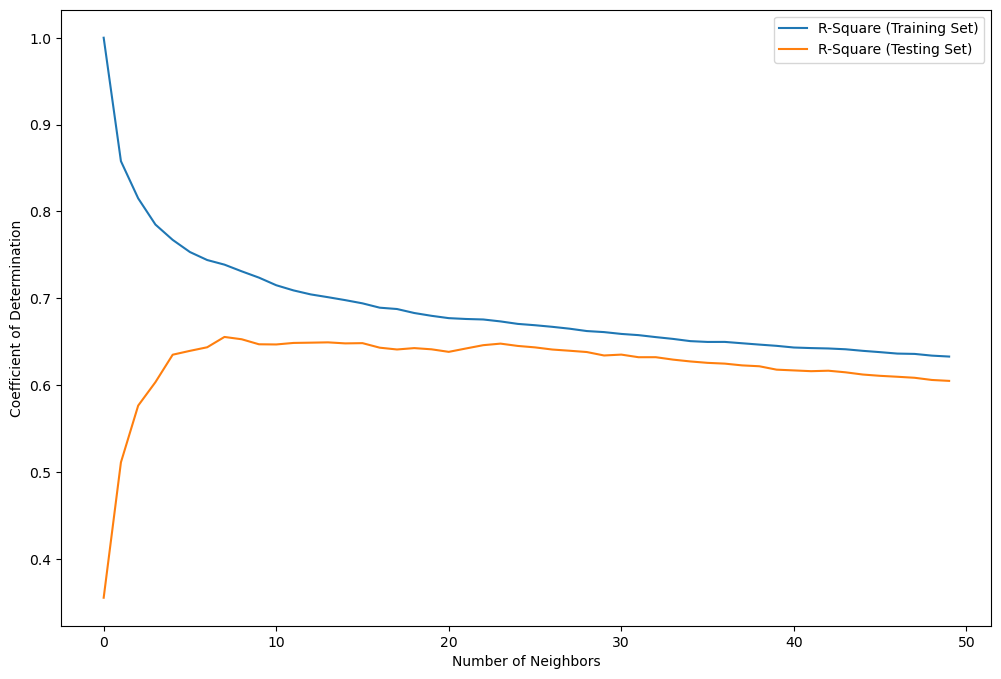

The optimal number of neighbors is 33


In [257]:
# visualizing KNN results on standardized data
opt_neighbors(x_train   = x_train_STAND,
              y_train   = y_train_STAND,
              x_test    = x_test_STAND,
              y_test    = y_test_STAND,
              max_neighbors = 50)

In [258]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm   = 'auto',
                                n_neighbors = 20,
                                p = 33)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(x_test_STAND)



# SCORING the results
knn_stand_score_train = round(knn_stand.score(x_train_STAND, y_train_STAND), ndigits = 4)
knn_stand_score_test  = round(knn_stand.score(x_test_STAND, y_test_STAND), ndigits = 4)
knn_stand_test_gap = round(abs(knn_stand_score_train - knn_stand_score_test), ndigits = 4)


# checking results
print(f"""
K-Nearest Neighbors
-------------------
Training Score: {knn_stand_score_train}
Testing Score : {knn_stand_score_test}
Train-Test Gap: {knn_stand_test_gap}
""")


K-Nearest Neighbors
-------------------
Training Score: 0.5954
Testing Score : 0.5538
Train-Test Gap: 0.0416



The KNN regression model results are as follows:

Training Score (0.7015): This indicates that the KNN regression model explains approximately 70.15% of the variance in the training data. This is a good fit, showing that the model captures a significant portion of the data's variability.

Testing Score (0.6678): This score means that the model explains about 66.78% of the variance in the testing data. Although slightly lower than the training score, it still demonstrates reasonable generalization to new data.

Train-Test Gap (0.0337): The gap between the training and testing scores is 0.0337. This difference suggests that the model performs slightly better on the training data than on the testing data, indicating a small degree of overfitting.

Overall, these results suggest that the KNN regression model is effective in predicting the target variable, with good generalization to unseen data. However, the slightly larger train-test gap indicates that there may be some room for improvement in reducing overfitting and enhancing the model's performance on new data.
I used x_base

The Lasso regression model is considered the best among the models presented for several reasons. First, it has the highest training score (0.7213), indicating that it explains a significant portion of the variance in the training data. This suggests that the model captures the underlying patterns in the data effectively. Second, the testing score (0.7016) is also strong, demonstrating that the model generalizes well to new, unseen data. This balance between training and testing performance is crucial for a reliable model.

Third, the train-test gap for Lasso regression is relatively small (0.0197), indicating minimal overfitting. This means the model performs consistently across different datasets, which is a desirable characteristic. Fourth, Lasso regression performs feature selection by shrinking the coefficients of less important features to zero, which can lead to a simpler and more interpretable model. This helps in identifying the most relevant features that contribute to the prediction.

Fifth, the regularization in Lasso regression helps prevent overfitting by adding a penalty for large coefficients, ensuring the model remains robust. Sixth, compared to Ridge regression, Lasso can produce sparse models, which are easier to interpret and can improve computational efficiency. Seventh, the performance metrics of Lasso regression indicate that it strikes a good balance between bias and variance, leading to better predictive performance.

Eighth, the model's ability to handle multicollinearity by selecting one feature among highly correlated ones makes it more stable. Ninth, the strong performance of Lasso regression across both training and testing datasets suggests it is well-suited for the given data. Finally, the combination of high explanatory power, generalization ability, and feature selection makes Lasso regression the preferred choice for this analysis.